对拉勾网中，市场类别中的，招聘岗位为地址在深圳的商业数据分析的299个岗位进行数据爬取，整理和分析

In [280]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

In [244]:
lagou = pd.read_csv('data.csv') 

# 1 数据概况

In [245]:
lagou.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   web-scraper-order      299 non-null    object
 1   web-scraper-start-url  299 non-null    object
 2   type                   299 non-null    object
 3   experience             299 non-null    object
 4   jobname                299 non-null    object
 5   address                299 non-null    object
 6   company                299 non-null    object
dtypes: object(7)
memory usage: 16.5+ KB


In [246]:
lagou.head()

,web-scraper-order,web-scraper-start-url,type,experience,jobname,address,company
0,1593617828-500,https://www.lagou.com/shenzhen-zhaopin/shangye...,"教育,移动互联网 / C轮 / 2000人以上",15k-30k\n 经...,数据分析师,国贸,阿卡索外教网
1,1593617757-386,https://www.lagou.com/shenzhen-zhaopin/shangye...,企业服务 / 上市公司 / 500-2000人,25k-35k\n 经...,T1226高级数据分析师 (MJ000146),南山区,极光
2,1593617757-388,https://www.lagou.com/shenzhen-zhaopin/shangye...,"移动互联网,金融 / 上市公司 / 2000人以上",20k-40k\n 经...,数据分析岗,福田区,中信银行信用卡中心
3,1593617782-420,https://www.lagou.com/shenzhen-zhaopin/shangye...,文娱丨内容 / C轮 / 2000人以上,15k-30k\n 经...,市场与用户研究经理——数据分析方向,南山区,字节跳动
4,1593617736-351,https://www.lagou.com/shenzhen-zhaopin/shangye...,"通讯电子,其他 / 不需要融资 / 150-500人",15k-25k\n 经...,市场分析/市场调研,南油,三星电机


总共爬取了299个‘商业数据分析’岗位的相关职位信息，接下来对数据进行重新整理

## 2数据清洗

In [247]:
#去掉无用的列
lagou.drop(['web-scraper-order', 'web-scraper-start-url'], axis = 1, inplace = True)

In [248]:
lagou.head()

,type,experience,jobname,address,company
0,"教育,移动互联网 / C轮 / 2000人以上",15k-30k\n 经...,数据分析师,国贸,阿卡索外教网
1,企业服务 / 上市公司 / 500-2000人,25k-35k\n 经...,T1226高级数据分析师 (MJ000146),南山区,极光
2,"移动互联网,金融 / 上市公司 / 2000人以上",20k-40k\n 经...,数据分析岗,福田区,中信银行信用卡中心
3,文娱丨内容 / C轮 / 2000人以上,15k-30k\n 经...,市场与用户研究经理——数据分析方向,南山区,字节跳动
4,"通讯电子,其他 / 不需要融资 / 150-500人",15k-25k\n 经...,市场分析/市场调研,南油,三星电机


In [249]:
#分割公司类型，公司规模，融资状况为单独的列，并删除原列
lagou['cat'] = lagou['type'].map(lambda x:x.split('/')[0])
lagou['fiance'] = lagou['type'].map(lambda x:x.split('/')[1])
lagou['size'] = lagou['type'].map(lambda x:x.split('/')[2])
lagou.drop(['type'], axis = 1, inplace = True)

In [251]:
lagou.head()

,experience,jobname,address,company,cat,fiance,size
0,15k-30k\n 经...,数据分析师,国贸,阿卡索外教网,"教育,移动互联网",C轮,2000人以上
1,25k-35k\n 经...,T1226高级数据分析师 (MJ000146),南山区,极光,企业服务,上市公司,500-2000人
2,20k-40k\n 经...,数据分析岗,福田区,中信银行信用卡中心,"移动互联网,金融",上市公司,2000人以上
3,15k-30k\n 经...,市场与用户研究经理——数据分析方向,南山区,字节跳动,文娱丨内容,C轮,2000人以上
4,15k-25k\n 经...,市场分析/市场调研,南油,三星电机,"通讯电子,其他",不需要融资,150-500人


In [252]:
#分割薪资，经验和学历
lagou['salary'] = lagou['experience'].map(lambda x:x.split('\n')[0])
lagou['exper'] = lagou['experience'].map(lambda x:x.split('\n')[1])
lagou.drop('experience', axis = 1, inplace = True)

In [253]:
lagou['experience'] = lagou['exper'].map(lambda x:x.split('/')[0])
lagou['education'] = lagou['exper'].map(lambda x:x.split('/')[1])
lagou.drop('exper', axis = 1, inplace = True)

In [254]:
lagou.head(10)

,jobname,address,company,cat,fiance,size,salary,experience,education
0,数据分析师,国贸,阿卡索外教网,"教育,移动互联网",C轮,2000人以上,15k-30k,经验应届毕业生,大专
1,T1226高级数据分析师 (MJ000146),南山区,极光,企业服务,上市公司,500-2000人,25k-35k,经验3-5年,本科
2,数据分析岗,福田区,中信银行信用卡中心,"移动互联网,金融",上市公司,2000人以上,20k-40k,经验3-5年,不限
3,市场与用户研究经理——数据分析方向,南山区,字节跳动,文娱丨内容,C轮,2000人以上,15k-30k,经验3-5年,本科
4,市场分析/市场调研,南油,三星电机,"通讯电子,其他",不需要融资,150-500人,15k-25k,经验3-5年,本科
5,商业数据分析师,华侨城,超级猩猩健身,移动互联网,D轮及以上,150-500人,15k-25k,经验3-5年,不限
6,游戏业务中台数据分析师,南山区,字节跳动,文娱丨内容,C轮,2000人以上,18k-36k,经验不限,本科
7,游戏数据分析师,南山区,动能无线,"移动互联网,广告营销",未融资,50-150人,8k-16k,经验1-3年,本科
8,金融/银行/互联网 数据分析 数据挖掘岗,福田区,长亮科技,企业服务,上市公司,2000人以上,10k-15k,经验1-3年,本科
9,数据分析师,南山区,微众信科,"金融,数据服务",D轮及以上,150-500人,10k-18k,经验不限,硕士


In [255]:
#行业领域分割，以行业类别中的第一类为主
#因为cat内多个行业之间的分隔符不统一(有逗号，顿号，竖线)，先进行统一
lagou['cat'] = lagou['cat'].str.replace(' ',',')
lagou['cat'] = lagou['cat'].str.replace('、', ',')
lagou['cat'] = lagou['cat'].str.replace('丨', ',')
lagou['type'] = lagou['cat'].map(lambda x:x.split(',')[0])
lagou.drop('cat', axis = 1, inplace = True)

In [256]:
lagou.tail(5)

,jobname,address,company,cat,fiance,size,salary,experience,education,type
294,数据分析师,科技园,来电科技,"移动互联网,消费生活,",不需要融资,2000人以上,11k-16k·13薪,经验3-5年,本科,移动互联网
295,数据分析专家,南山区,字节跳动,"文娱,内容,",C轮,2000人以上,35k-70k,经验不限,本科,文娱
296,数据分析师（社会化媒体方向）(J11446),科技园,明略科技集团,"数据服务,广告营销,",D轮及以上,2000人以上,6k-8k,经验1-3年,本科,数据服务
297,数据分析,福田区,菲凡数据,"电商,数据服务,",不需要融资,50-150人,10k-15k,经验3-5年,本科,电商
298,数据分析师,科技园,微众信科,"金融,数据服务,",D轮及以上,150-500人,15k-25k,经验3-5年,本科,金融


In [258]:
#salary中混入了‘·xxx薪'的情况
lagou['salary'] = lagou['salary'].str.replace('·...', '')

In [265]:
lagou.tail(5)

,jobname,address,company,fiance,size,salary,experience,education,type
294,数据分析师,科技园,来电科技,不需要融资,2000人以上,11k-16k,经验3-5年,本科,移动互联网
295,数据分析专家,南山区,字节跳动,C轮,2000人以上,35k-70k,经验不限,本科,文娱
296,数据分析师（社会化媒体方向）(J11446),科技园,明略科技集团,D轮及以上,2000人以上,6k-8k,经验1-3年,本科,数据服务
297,数据分析,福田区,菲凡数据,不需要融资,50-150人,10k-15k,经验3-5年,本科,电商
298,数据分析师,科技园,微众信科,D轮及以上,150-500人,15k-25k,经验3-5年,本科,金融


In [283]:
#薪水范围造成薪水类别不同，先采取分割薪水最小值和最大值,再计算平均值
lagou['start_salary'] = pd.to_numeric(lagou['salary'].map(lambda x:x.split('k-')[0]))
lagou['end_salary'] = lagou['salary'].map(lambda x:x.split('k-')[1])
lagou['end_salary'] = pd.to_numeric(lagou['end_salary'].str.replace('k', ''))
lagou['avg_salary'] = (lagou['start_salary'] + lagou['end_salary'])/2

In [284]:
lagou.head()

,jobname,address,company,fiance,size,salary,experience,education,type,start_salary,end_salary,avg_salary
0,数据分析师,国贸,阿卡索外教网,C轮,2000人以上,15k-30k,经验应届毕业生,大专,教育,15,30,22.5
1,T1226高级数据分析师 (MJ000146),南山区,极光,上市公司,500-2000人,25k-35k,经验3-5年,本科,企业服务,25,35,30.0
2,数据分析岗,福田区,中信银行信用卡中心,上市公司,2000人以上,20k-40k,经验3-5年,不限,移动互联网,20,40,30.0
3,市场与用户研究经理——数据分析方向,南山区,字节跳动,C轮,2000人以上,15k-30k,经验3-5年,本科,文娱,15,30,22.5
4,市场分析/市场调研,南油,三星电机,不需要融资,150-500人,15k-25k,经验3-5年,本科,通讯电子,15,25,20.0


In [286]:
#对experience列删除’经验‘二字
lagou['experience'] = lagou['experience'].str.replace('经验','')

In [297]:
lagou.head(5)

,jobname,address,company,fiance,size,salary,experience,education,type,start_salary,end_salary,avg_salary
0,数据分析师,国贸,阿卡索外教网,C轮,2000人以上,15k-30k,应届毕业生,大专,教育,15,30,22.5
1,T1226高级数据分析师 (MJ000146),南山区,极光,上市公司,500-2000人,25k-35k,3-5年,本科,企业服务,25,35,30.0
2,数据分析岗,福田区,中信银行信用卡中心,上市公司,2000人以上,20k-40k,3-5年,不限,移动互联网,20,40,30.0
3,市场与用户研究经理——数据分析方向,南山区,字节跳动,C轮,2000人以上,15k-30k,3-5年,本科,文娱,15,30,22.5
4,市场分析/市场调研,南油,三星电机,不需要融资,150-500人,15k-25k,3-5年,本科,通讯电子,15,25,20.0


# 2单变量分析与可视化

In [262]:
#让python在可视化中读出中文字符
from matplotlib.font_manager import FontProperties
myfont=FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf',size=14)
sns.set(font=myfont.get_name())

## 2.1数据分析岗位的薪酬状况

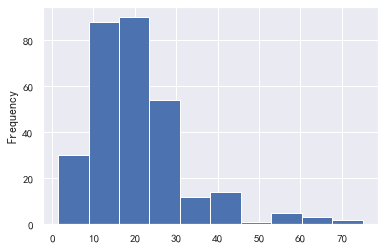

In [285]:
lagou['avg_salary'].plot(kind = 'hist')

在深圳，按提供的薪资平均值看，商业数据分析岗位的薪资高。薪资主要集中在10k-20k/月，有少部分公司招聘高级数据分析师或专家，薪资水平在30k以上。

## 2.2岗位工作经验和学历要求

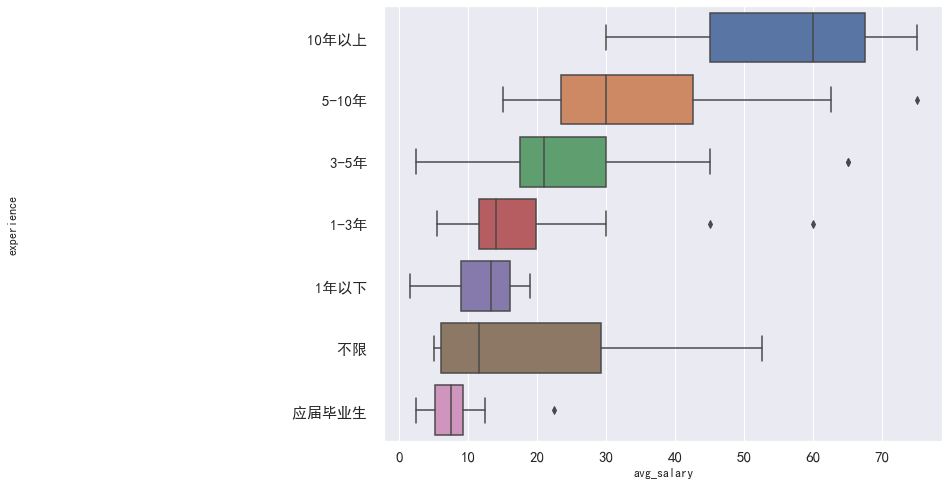

In [381]:
order = lagou.groupby(by=["experience"])["avg_salary"].median().sort_values(ascending = False).index
plt.figure(figsize = (10,8))
sns.boxplot(y = 'experience', x = 'avg_salary', data = lagou, order = order)
plt.tick_params(labelsize = 15)

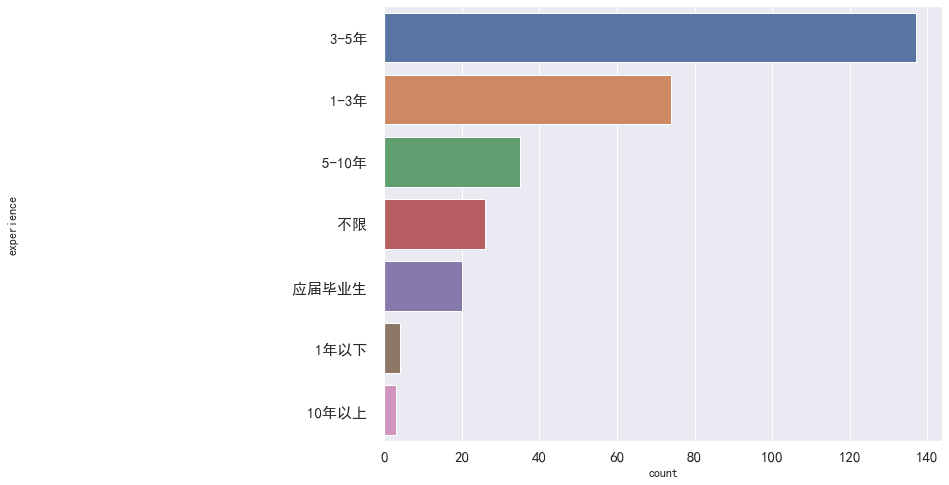

In [380]:
plt.figure(figsize = (10,8))
sns.countplot(y = 'experience', data = lagou, order = lagou['experience'].value_counts().index )
plt.tick_params(labelsize = 15)

发现： 
1. 数据分析岗位应证了那句“姜还是老的辣”，工作经验越多的应聘者，公司给的薪资水平越高。大部分职位对应聘人员的岗位经验要求是3-5年，可见数据分析师需要多年的实操和项目经验。
2. 不限经验的岗位薪资的分散度大，从低于10k到30k不等，说明不限经验的岗位在不同公司，不同经验的应聘者的薪资差距比较大。
3. 应届毕业生积累了1-3年经验后，最高工资可以翻1-2倍

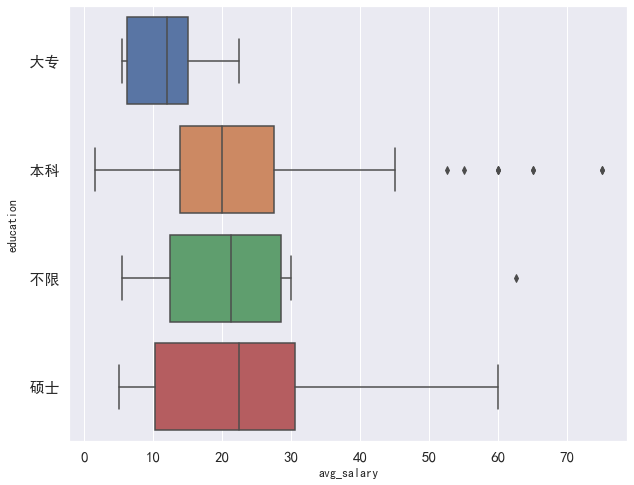

In [353]:
plt.figure(figsize = (10,8))
sns.boxplot(y = 'education', x = 'avg_salary', data = lagou)
plt.tick_params(labelsize = 15)

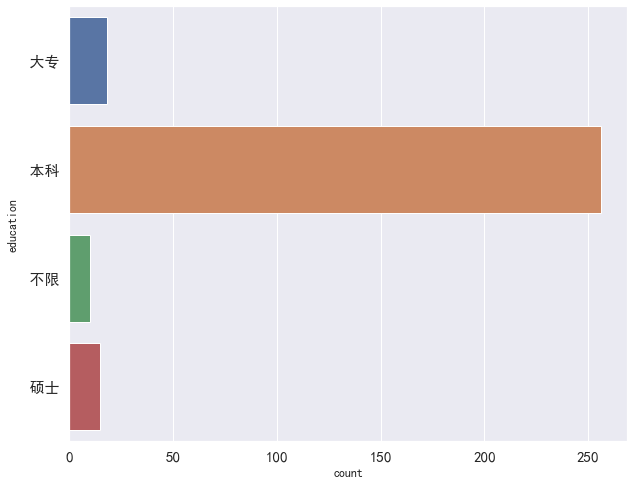

In [317]:
plt.figure(figsize = (10,8))
sns.countplot(y = 'education', data = lagou)
plt.tick_params(labelsize = 15)

发现： 
1. 数据分析岗位对于本科毕业生和硕士毕业生来说薪资福利远高于大专毕业生，最高薪资出现在要求本科学历的岗位。
2. 要求硕士毕业的岗位的平均薪资最高，但薪资分散度较大，有的岗位甚至低于大专要求的薪资。
3. 学历不限的岗位提供的薪资也很可观，说明数据分析岗位一方面看学历，另一方面更注重经验。绝大部分职位要求应聘人为本科毕业，大专的比例比硕士要高一些，结合岗位工作经验的要求，可见数据分析岗位对工作经验和学历要求都比较高。

## 2.3行业领域

In [329]:
round(lagou['type'].value_counts(1),2)

移动互联网    0.30
社交       0.13
金融       0.11
电商       0.09
企业服务     0.08
文娱       0.06
数据服务     0.04
硬件       0.04
其他       0.02
消费生活     0.02
游戏       0.02
人工智能     0.02
房产家居     0.02
通讯电子     0.02
教育       0.01
软件开发     0.01
物流       0.01
工具       0.00
Name: type, dtype: float64

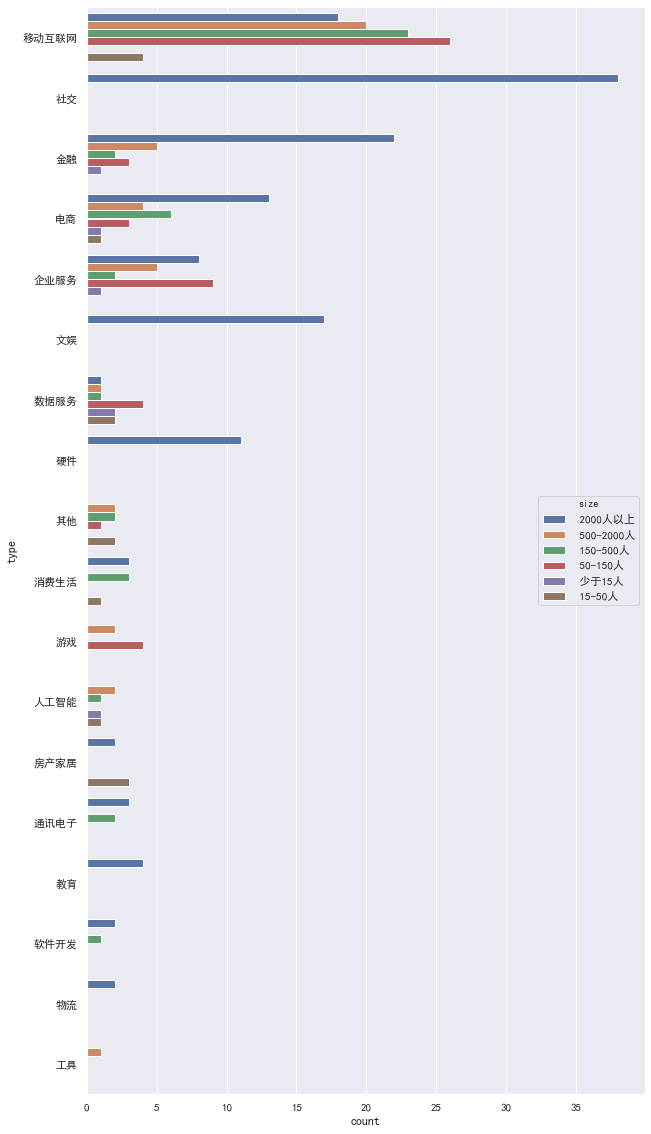

In [339]:
plt.figure(figsize = (10,20))
sns.countplot( y = 'type',hue = 'size', data =lagou, order = lagou['type'].value_counts().index)

发现： 
1. 爬取的数据中，一共有18个行业招聘数据分析岗位，其中移动互联网行业对数据分析师岗位的需求最多，占据30%，其次是社交(13%)、金融(11%)、电商和企业服务。这几个行业几乎都属于互联网行业下的细分行业，在大数据时代，这些行业对数据分析的应用越来越广，对数据分析师人才的需求越来越大。
2. 招聘数据分析师岗位的公司中，移动互联网公司涵盖了大、中、小型企业，移动互联网行业玩家多，垂直细分领域多，由于业务原因即使是小型公司也会有自己的数据仓库，各个领域都对数据分析师的需求大。而社交、金融、电商、文娱、硬件等行业主要是2000人以上规模的大公司。

## 2.4融资阶段

In [349]:
round(lagou['fiance'].value_counts(1),2)

 上市公司      0.32
 不需要融资     0.24
 C轮        0.12
 未融资       0.11
 A轮        0.08
 B轮        0.08
 D轮及以上     0.04
 天使轮       0.01
Name: fiance, dtype: float64

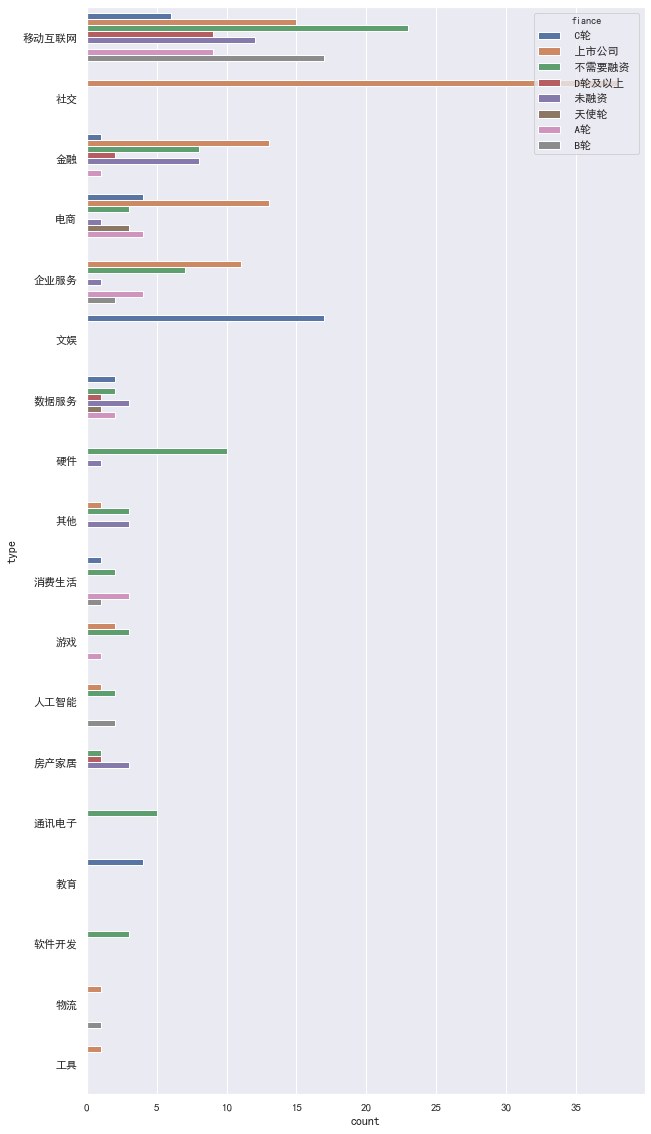

In [352]:
plt.figure(figsize = (10,20))
sns.countplot( y = 'type',hue = 'fiance', data =lagou, order = lagou['type'].value_counts().index)

发现： 
1. 上市公司和不需要融资的公司对数据分析师人才需求大，分别占据了32%和24%。
2. 移动互联网公司中不需要融资的公司居多。在融资轮阶段的公司中，处于B轮的公司最多，A轮和D轮的公司数量相当，说明移动互联网行业的新入的，还在迅速扩张的玩家多，体量大、成熟的公司也多。

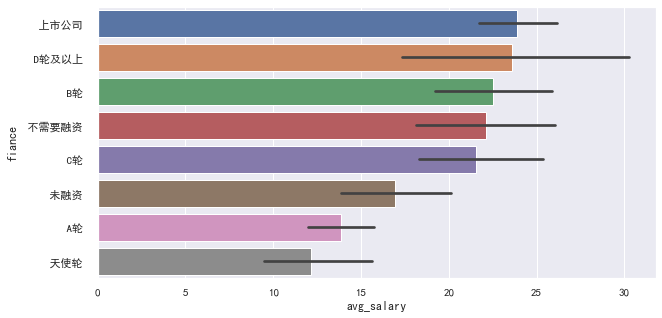

In [390]:
plt.figure(figsize = (10,5))
order2 = lagou.groupby(by=["fiance"])["avg_salary"].mean().sort_values(ascending = False).index
sns.barplot(x = 'avg_salary', y = 'fiance', data =lagou, order =order2)

发现：上市公司、D轮及以上的公司提供的薪资水平更高。

总结： 在深圳，上市公司、D轮及以上公司等大平台多，移动互联网公司多有在深圳有总部或分公司，因此对数据分析师人才的需求大，商业数据分析师的岗位总体薪资高，同时岗位的经验和学历要求较高，主要要求本科学历和3-5年的工作经验。